In [15]:
import sys
import os

# Add the `src` directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))  # Go one level up to access `src`

import pandas as pd
import logging
from data_preprocessing import DataPreprocessor  # Import directly without `src`

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Path to your local data file
data_path = os.path.abspath(os.path.join('..', 'data', 'Copy of BrentOilPrices.csv'))  # Adjust path as necessary

# Initialize DataPreprocessor
preprocessor = DataPreprocessor(file_path=data_path, logger=logger)

# Load the data
data = preprocessor.load_data()

# Inspect the data
preprocessor.inspect(data)


INFO:__main__:Starting to load data from the local file path.
C:\Users\user\Documents\10acadamy\week9\src\data_preprocessing.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['Date'] = pd.to_datetime(self.data['Date'].str.strip(), errors='coerce')
INFO:__main__:Converted 'Date' column to datetime format.
INFO:__main__:Data loaded into DataFrame successfully.
INFO:__main__:DataFrame dimensions: (9011, 2)
INFO:__main__:Displayed data types for each column.
INFO:__main__:No missing values detected.
INFO:__main__:Duplicate rows found: 0
INFO:__main__:Data inspection completed successfully.


Dimensions (rows, columns): (9011, 2)

Data Types:
Date     datetime64[ns]
Price           float64
dtype: object

Missing Values:
Series([], dtype: int64)

Unique Values in Each Column:
Date     9011
Price    5015
dtype: int64

Number of duplicate rows: 0

Summary Statistics for Numeric Columns:
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")


Line Plot for Time Series Data

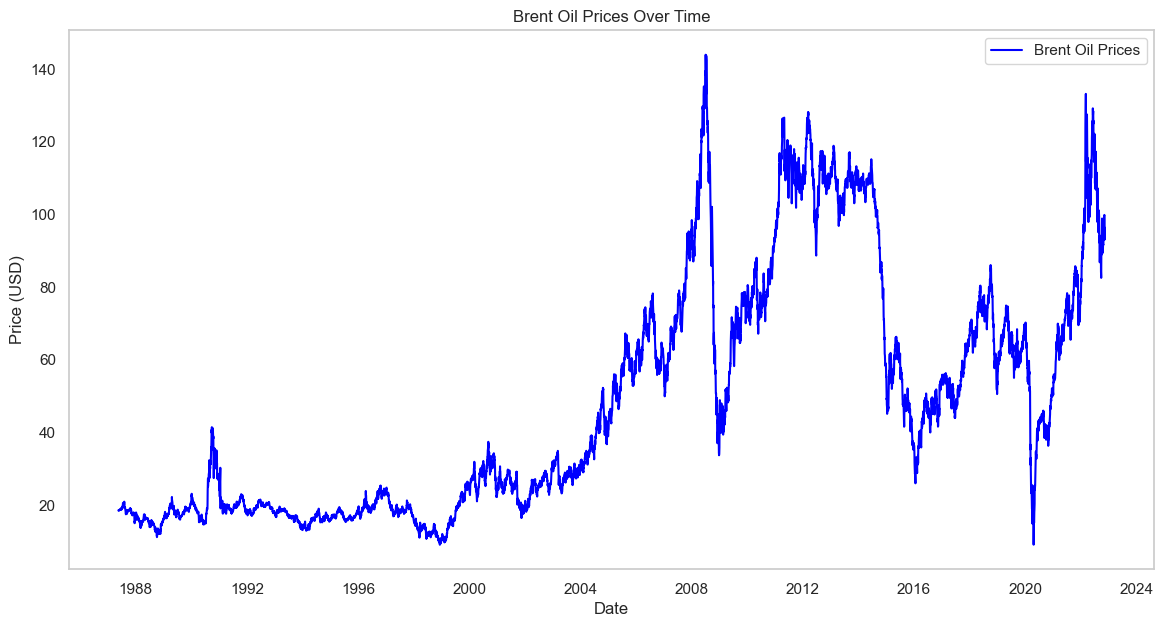

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], label='Brent Oil Prices', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


# Histogram of Prices

# Visualize the distribution of oil prices to identify any anomalies or patterns:

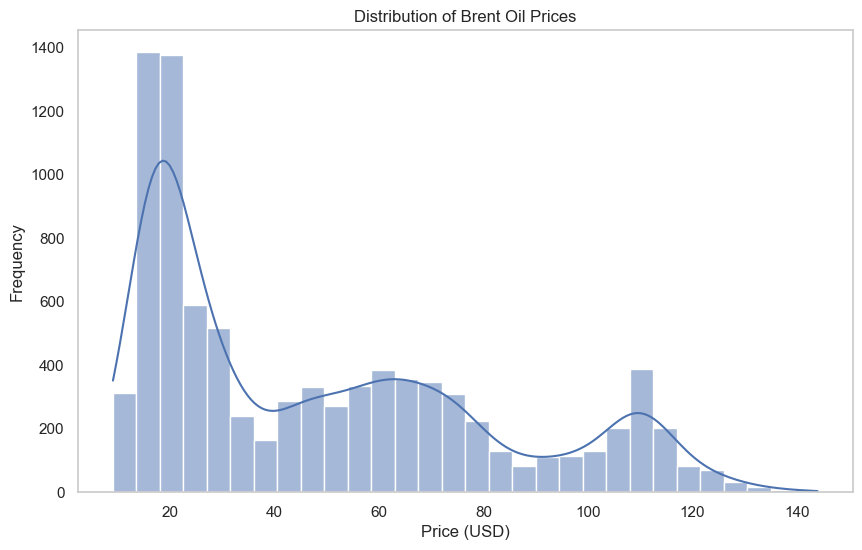

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


Exploratory Data Analysis (EDA)
Step 1: Seasonal Decomposition

You can use seasonal decomposition to understand seasonal patterns in the data:

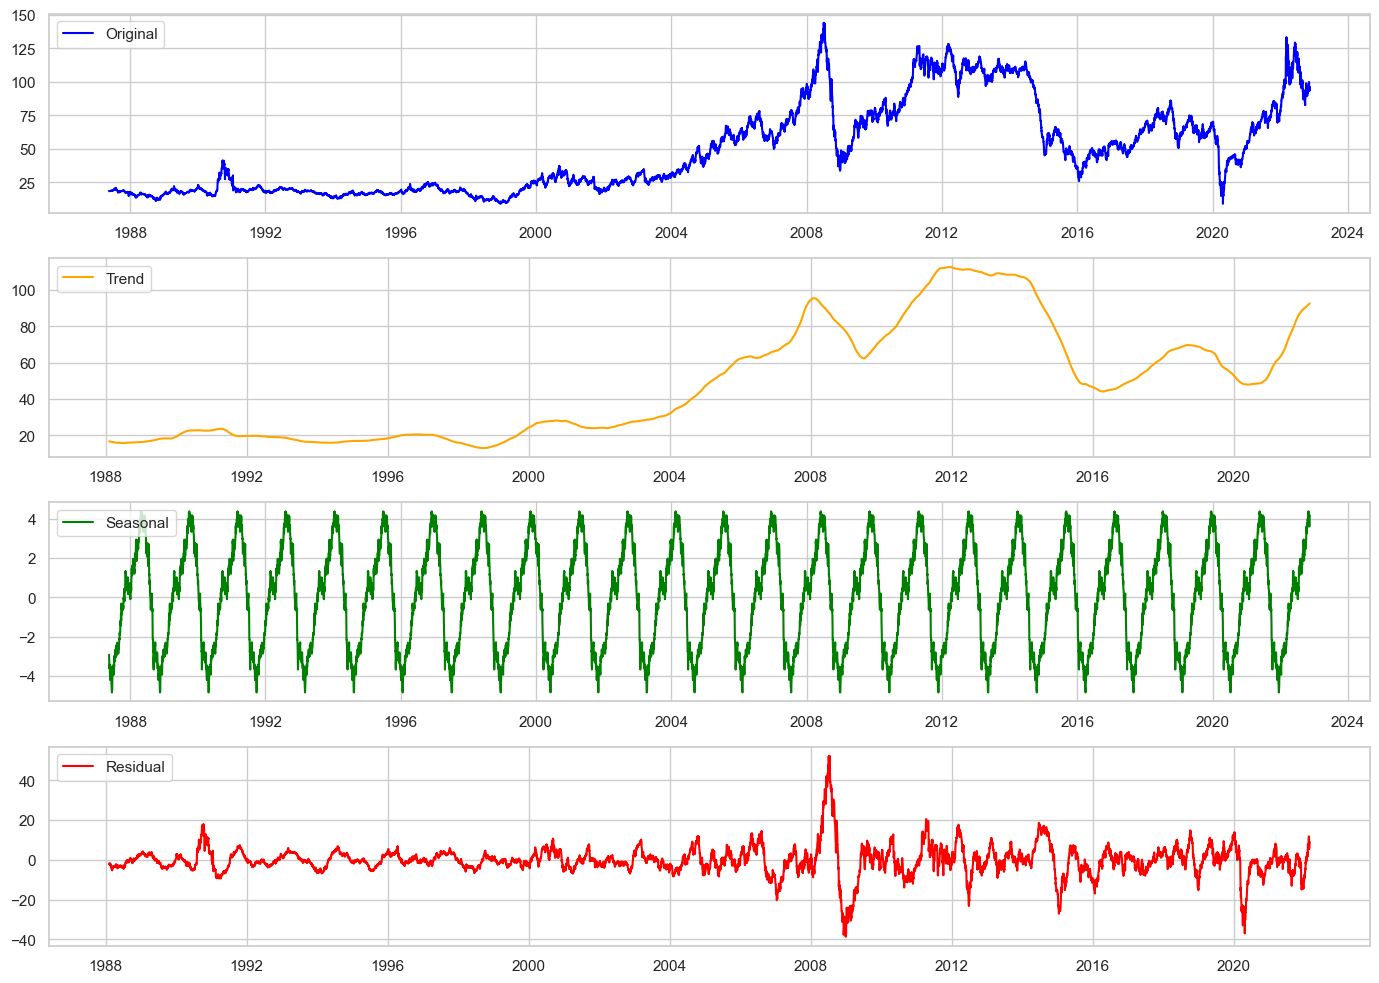

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Date as index
data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Price'], model='additive', period=365)  # Adjust period if necessary
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(data['Price'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Correlation Analysis

If you have other relevant datasets (e.g., economic indicators), you can visualize the correlation between oil prices and these factors. Here's an example assuming you have GDP data:



In [19]:
import pandas as pd

# Load your GDP data (update the path as necessary)
gdp_data = pd.read_csv('../data/Countries GDP 1960-2020.csv')

# Reshape the DataFrame from wide to long format
gdp_long = pd.melt(gdp_data, id_vars=['Country Name', 'Country Code'], 
                   var_name='Year', value_name='GDP')

# Convert the 'Year' column to datetime format (this will be the first day of each year)
gdp_long['Year'] = pd.to_datetime(gdp_long['Year'], format='%Y')

# Set the 'Year' as the index (optional)
gdp_long.set_index('Year', inplace=True)

# Display the reshaped data
print(gdp_long.head())


                           Country Name Country Code           GDP
Year                                                              
1960-01-01  Africa Eastern and Southern          AFE  1.931311e+10
1960-01-01   Africa Western and Central          AFW  1.040428e+10
1960-01-01                    Australia          AUS  1.860679e+10
1960-01-01                      Austria          AUT  6.592694e+09
1960-01-01                      Burundi          BDI  1.960000e+08


In [21]:
# Calculate year-over-year GDP growth rate for each country without forward-filling
gdp_long['GDP_growth_rate'] = gdp_long.groupby('Country Name')['GDP'].pct_change(fill_method=None) * 100

# Display the data with the growth rate column
print(gdp_long.head())


                           Country Name Country Code           GDP  \
Year                                                                 
1960-01-01  Africa Eastern and Southern          AFE  1.931311e+10   
1960-01-01   Africa Western and Central          AFW  1.040428e+10   
1960-01-01                    Australia          AUS  1.860679e+10   
1960-01-01                      Austria          AUT  6.592694e+09   
1960-01-01                      Burundi          BDI  1.960000e+08   

            GDP_growth_rate  
Year                         
1960-01-01              NaN  
1960-01-01              NaN  
1960-01-01              NaN  
1960-01-01              NaN  
1960-01-01              NaN  


In [22]:
# Sort data by 'Country Name' and 'Year' to ensure pct_change works as expected
gdp_long = gdp_long.sort_values(['Country Name', 'Year'])

# Calculate GDP growth rate with no forward-filling
gdp_long['GDP_growth_rate'] = gdp_long.groupby('Country Name')['GDP'].pct_change(fill_method=None) * 100

# Display the updated data with the calculated growth rate
print(gdp_long.head(10))


                           Country Name Country Code           GDP  \
Year                                                                 
1960-01-01  Africa Eastern and Southern          AFE  1.931311e+10   
1961-01-01  Africa Eastern and Southern          AFE  1.972349e+10   
1962-01-01  Africa Eastern and Southern          AFE  2.149392e+10   
1963-01-01  Africa Eastern and Southern          AFE  2.573321e+10   
1964-01-01  Africa Eastern and Southern          AFE  2.352744e+10   
1965-01-01  Africa Eastern and Southern          AFE  2.681057e+10   
1966-01-01  Africa Eastern and Southern          AFE  2.915216e+10   
1967-01-01  Africa Eastern and Southern          AFE  3.017317e+10   
1968-01-01  Africa Eastern and Southern          AFE  3.287706e+10   
1969-01-01  Africa Eastern and Southern          AFE  3.774435e+10   

            GDP_growth_rate  
Year                         
1960-01-01              NaN  
1961-01-01         2.124887  
1962-01-01         8.976262  
1963-01-0